# 3D Visualization

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

import torch.optim as optim
from rockgan.architecture import *
from rockgan.utils import *

In [9]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

DEVICE = torch.device('cuda')

## Training Data

In [4]:
DATASET = torch.from_numpy(np.load('../data/Berea_subpatches.npy')[:100])
print(DATASET.shape)

torch.Size([100, 128, 128, 128])


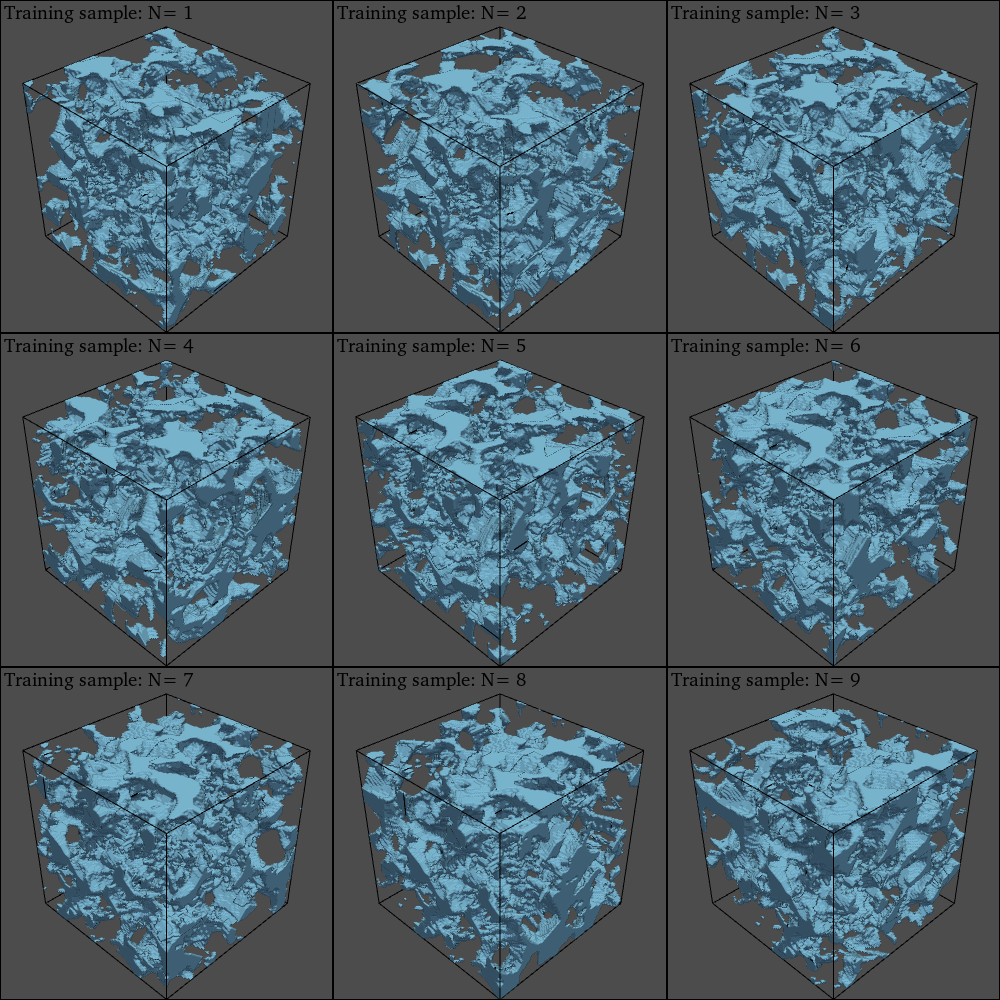

In [24]:
columns = 3
rows = 3
t = np.arange(1,rows*columns+1).reshape(rows,columns)
p = pv.Plotter(shape=(rows, columns))
for i in range(rows):
    for j in range(columns):
        grid = pv.UniformGrid(dims=(129,129,129))
        grid.cell_data["values"] = DATASET[t[i,j],:,:].flatten() 
        threshed = grid.threshold(value=0, invert=True)
        outline = grid.outline()
        p.subplot(i,j)
        p.add_mesh(outline, color="k")
        p.add_mesh(threshed, color='lightskyblue',interpolate_before_map=True, show_edges=0, smooth_shading=True, metallic=1)
        p.add_text('Training sample: N= {}'.format(t[i,j]), font_size=12, font='times', color='black')
        p.camera_position = [-5, 5, 5]
        p.window_size = [1000,1000]
        #p.camera.zoom(1.1)
# p.save_graphic('../figures/training_samples.eps',raster=False )
# p.save_graphic('../figures/training_samples.eps')  
# p.screenshot('../figures/training_3D_samples.png', transparent_background=True)
p.show()

## RockGAN results

In [12]:
# Training hyperparameters
LEARNING_RATE = 1e-3
BATCH_SIZE = 32
Z_DIM = 16
# fixed noise for display
fixed_noise = torch.randn(BATCH_SIZE,1, Z_DIM, Z_DIM, Z_DIM).to(DEVICE)
# generator
gen = Generator(in_channel=1, out_channel=1).to(DEVICE)
# optimizer
opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.0, 0.9))

In [22]:
#Loading generator per epochs
load_checkpoint("../checkpoints/generator/generator_no_poro_81_V2.pt", \
                model=gen, optimizer=opt_gen, lr=1e-3)
RockGAN_images = np.round(gen(fixed_noise).detach().cpu().numpy().reshape(BATCH_SIZE,128,128,128))

=> Loading checkpoint


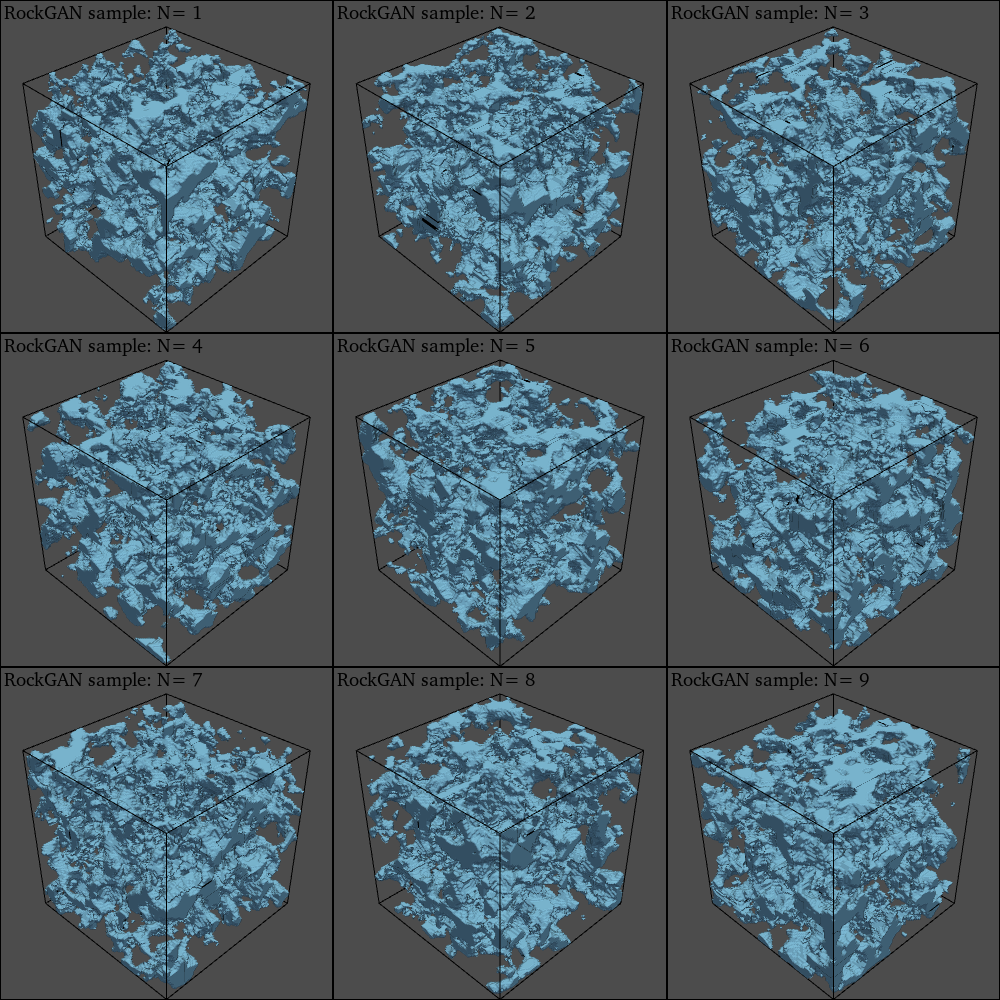

In [23]:
columns = 3
rows = 3
t = np.arange(1,rows*columns+1).reshape(rows,columns)
p = pv.Plotter(shape=(rows, columns))
for i in range(rows):
    for j in range(columns):
        grid = pv.UniformGrid(dims=(129,129,129))
        grid.cell_data["values"] = RockGAN_images[t[i,j],:,:].flatten() 
        threshed = grid.threshold(value=0, invert=True)
        outline = grid.outline()
        p.subplot(i,j)
        p.add_mesh(outline, color="k")
        p.add_mesh(threshed, color='lightskyblue',interpolate_before_map=True, show_edges=0, smooth_shading=True, metallic=1)
        p.add_text('RockGAN sample: N= {}'.format(t[i,j]), font_size=12, font='times', color='black')
        p.camera_position = [-5, 5, 5]
        p.window_size = [1000,1000]
        #p.camera.zoom(1.1)
# p.save_graphic('../figures/RockGAN_3D_samples.eps',raster=False )
# p.save_graphic('../figures/RockGAN_3D_samples.eps')  
# p.screenshot('../figures/RockGAN_3D_samples.png', transparent_background=True)
p.show()

## CRockGAN results

In [25]:
#Loading generator per epochs
load_checkpoint("../checkpoints/generator/generator_poro_81_v4.pt", \
                model=gen, optimizer=opt_gen, lr=1e-3)
CRockGAN_images = np.round(gen(fixed_noise).detach().cpu().numpy().reshape(BATCH_SIZE,128,128,128))

=> Loading checkpoint


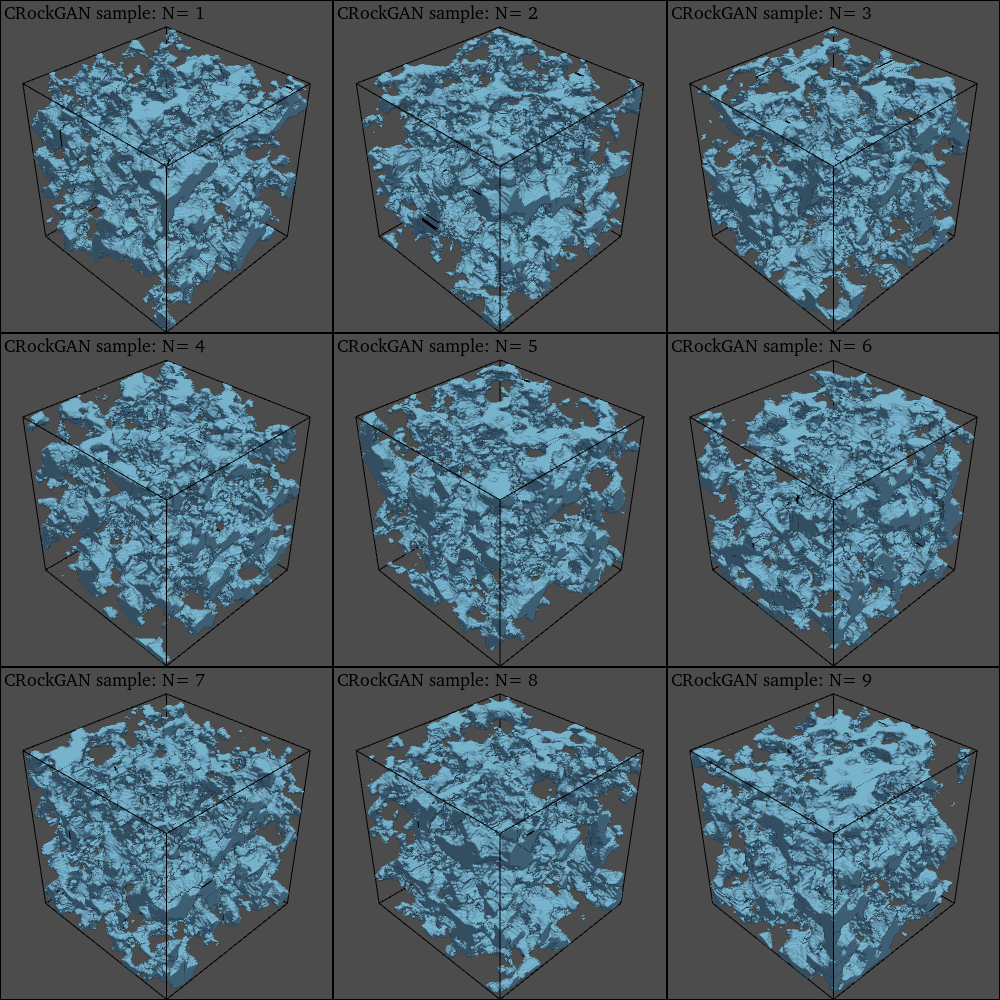

In [26]:
columns = 3
rows = 3
t = np.arange(1,rows*columns+1).reshape(rows,columns)
p = pv.Plotter(shape=(rows, columns))
for i in range(rows):
    for j in range(columns):
        grid = pv.UniformGrid(dims=(129,129,129))
        grid.cell_data["values"] = RockGAN_images[t[i,j],:,:].flatten() 
        threshed = grid.threshold(value=0, invert=True)
        outline = grid.outline()
        p.subplot(i,j)
        p.add_mesh(outline, color="k")
        p.add_mesh(threshed, color='lightskyblue',interpolate_before_map=True, show_edges=0, smooth_shading=True, metallic=1)
        p.add_text('CRockGAN sample: N= {}'.format(t[i,j]), font_size=12, font='times', color='black')
        p.camera_position = [-5, 5, 5]
        p.window_size = [1000,1000]
        #p.camera.zoom(1.1)
# p.save_graphic('../figures/CRockGAN_3D_samples.eps',raster=False )
#p.save_graphic('../figures/CRockGAN_3D_samples.eps')  
# p.screenshot('../figures/CRockGAN_3D_samples.png', transparent_background=True)
p.show()